In [127]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as panda
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as numpy
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as seaborn
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix

In [128]:
fraudulent_postings = panda.read_csv('../data/fraudulent_postings_cleaned.csv')

In [129]:
# Selecting relevant features and target variable
features = fraudulent_postings[['telecommuting', 'ratio', 'summary', 'character_count']]
target_variable = fraudulent_postings['fraudulent']

In [130]:
# set to a specific integer value to ensure consistent results across different runs of the code.
random_state = 99
# test_size is a parameter that specifies the proportion of the dataset that should be allocated to the testing set.
test_size = 0.33

features_train_set, features_test_set, target_variable_train_set, target_variable_test_set = train_test_split(features, target_variable, test_size=test_size, random_state=random_state)

In [131]:
# Creates new dataframe with number columns
features_train_num_set = features_train_set[['telecommuting', 'ratio', 'character_count']]
features_test_num_set = features_test_set[['telecommuting', 'ratio', 'character_count']]

In [132]:
# This initializes a CountVectorizer object with English stop words removed. Stop words are common words like "the", "is", "in", etc.,
count_vectorizer = CountVectorizer(stop_words='english')

# Transform summary data from training set into numerical feature vectors
count_train_features = count_vectorizer.fit_transform(features_train_set.summary.values)

# Transform summary data from testing set into numerical feature vectors
count_test_features = count_vectorizer.transform(features_test_set.summary.values)

In [133]:
# Initialize TfidfVectorizer with English stop words removed and max document frequency set to 100%
tfidf_vectorizer = TfidfVectorizer(stop_words="english", max_df=1.0)

# Transform text data from training set into TF-IDF weighted numerical feature vectors
tfidf_train_features = tfidf_vectorizer.fit_transform(features_train_set.summary)

# Transform text data from testing set into TF-IDF weighted numerical feature vectors
tfidf_test_features = tfidf_vectorizer.transform(features_test_set.summary)

In [134]:
# Create DataFrame from the dense representation of CountVectorizer output
count_df = panda.DataFrame(count_train_features.toarray(), columns=count_vectorizer.get_feature_names_out())

# Create DataFrame from the dense representation of TfidfVectorizer output
tfidf_df = panda.DataFrame(tfidf_train_features.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

In [135]:
# Initialize Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()

# Train the classifier on count-based features and corresponding labels from the training set
nb_classifier.fit(count_train_features, target_variable_train_set)

# Generate predictions for the test set using the trained classifier
predictions = nb_classifier.predict(count_test_features)

# Calculate the accuracy of the predictions
accuracy = metrics.accuracy_score(target_variable_test_set, predictions)

# Print the accuracy score
print("Accuracy:", accuracy)

Accuracy: 0.9648169336384439


In [136]:
# Calculate the F1 score
f1_score = metrics.f1_score(target_variable_test_set, predictions)

# Print the F1 score
print("F1 Score:", f1_score)

F1 Score: 0.7050359712230215


In [137]:
# Initialize SGDClassifier with 'log' loss function
clf_log = SGDClassifier(loss='log_loss').fit(count_train_features, target_variable_train_set)

# Generate predictions using the trained logistic regression classifier
pred_log = clf_log.predict(count_test_features)

# Calculate the accuracy of the predictions
accuracy_log = metrics.accuracy_score(target_variable_test_set, pred_log)

# Print the accuracy score
print("Accuracy (Logistic Regression - Log):", accuracy_log)

Accuracy (Logistic Regression - Log): 0.9731121281464531


In [139]:
# Initialize SGDClassifier with 'log' loss function for logistic regression
clf_num = SGDClassifier(loss='log_loss').fit(features_train_num_set, target_variable_train_set)

# Generate predictions using the trained logistic regression classifier
pred_num = clf_num.predict(features_test_num_set)

# Calculate the accuracy of the predictions
accuracy_num = metrics.accuracy_score(target_variable_test_set, pred_num)

# Print the accuracy score
print("Accuracy (Logistic Regression - Numerical):", accuracy_num)

Accuracy (Logistic Regression - Numerical): 0.9273455377574371


In [140]:
prediction_array = []

# Combine predictions from pred_num and pred_log
for num_pred, log_pred in zip(pred_num, pred_log):
    if num_pred == 0 and log_pred == 0:
        prediction_array.append(0)
    else:
        prediction_array.append(1)


In [141]:
# Calculate the accuracy score of the combined predictions compared to the actual labels
accuracy_combined = metrics.accuracy_score(target_variable_test_set, prediction_array)

print("Combined Model Accuracy Score:", accuracy_combined)

Combined Model Accuracy Score: 0.9731121281464531


In [142]:
# Compute the F1 score of the combined predictions compared to the actual labels
f1_score_combined = metrics.f1_score(target_variable_test_set, prediction_array)

# Print the F1 score
print("Combined Model F1 Score:", f1_score_combined)

Combined Model F1 Score: 0.8097165991902834


In [143]:
# Calculate the confusion matrix
cf_matrix = confusion_matrix(target_variable_test_set, prediction_array)

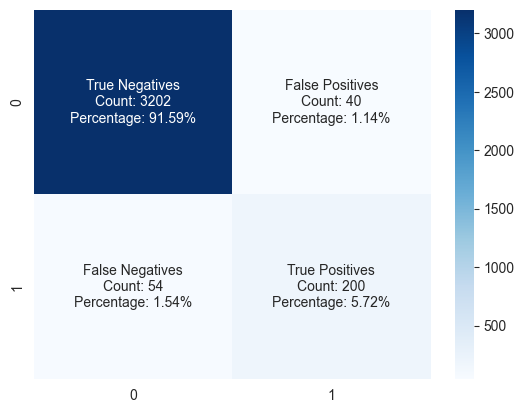

In [144]:
# Prepare labels for heatmap visualization of the confusion matrix
group_names = ["True Negatives", "False Positives", "False Negatives", "True Positives"]
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten() / numpy.sum(cf_matrix)]
labels = [f'{name}\nCount: {count}\nPercentage: {percentage}' for name, count, percentage in zip(group_names, group_counts, group_percentages)]
labels = numpy.asarray(labels).reshape(2, 2)
seaborn.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues');

In [145]:
count_class_0 = (target_variable_test_set == 0).sum()
count_class_1 = (target_variable_test_set == 1).sum()

print("Number of samples in class 0:", count_class_0)
print("Number of samples in class 1:", count_class_1)


Number of samples in class 0: 3242
Number of samples in class 1: 254
